# DEL 1 - Läs in bibliotek och data
Först behöver vi importera olika bibliotek, tex pandas och funktioner som vi skapat i de olika mapparna

Sen behöver vi läsa in och städa datan. Filen är snygg som den är, vi har inga NaN-värden eller dubletter och kategorinamnen ser bra ut.
Det vi behöver fixa är --> datatyperna

In [11]:
"""Importerar bibliotek och funktioner."""

import src.io_utils as io
import src.ecommerce as ec
import pandas as pd
import matplotlib.pyplot as plt
from src.io_utils import load_data, clean_data
import src.metrics as me 
import src.io_utils as io
import src.metrics as me
import src.viz as vi
import src.ecommerce as ec
from src.io_utils import load_data, clean_data
from src.metrics import order_per_weekday
from src.metrics import order_per_month
from src.viz import plot_orders_weekday, plot_orders_month

In [12]:
"""Skapa en variabel 'df_raw' där vi läser in filen med funktionen som vi skapat i 'io_utils"""

df_raw = load_data("data/ecommerce_sales.csv")

"""Skapa en ny variabe 'df' där vi sparar en 'städat' fil med en funktion vi skapat i 'io_utils ."""

df = clean_data(df_raw)

df['month'] = df['date'].dt.to_period('M')  # Tar ut månaden från datumet

df['day_of_week'] = df['date'].dt.day_name() # Tar ur veckodagen från datumet


In [13]:
"""Skapa en variabel 'df' där vi läser in filen med funktionen som vi skapat i 'io_utils"""
#Skapa en variabel 'df_raw' där vi läser in filen med funktionen som vi skapat i 'io_utils
df_raw = io.load_data("data/ecommerce_sales.csv")
#Skapa en ny variabe 'df' där vi sparar en 'städat' fil med en funktion vi skapat i 'io_utils 
df = io.clean_data(df_raw)

"""Skapa en ny variabe 'df_clean' där vi sparar en 'städat' fil med en funktion vi skapat i 'io_utils ."""


"Skapa en ny variabe 'df_clean' där vi sparar en 'städat' fil med en funktion vi skapat i 'io_utils ."

# DEL 2 - Presentera frågeställningar
- Vad säljer? - vilka kategorier driver mest intäkt?
- Var säljer vi? - vilka städer står för störst intäkt?
- När säljer vi? - finns tidsmönster/säsong i försäljningen?
- Hur ser en typisk order ut? - AOV (Average Order Value) och spridning.
- Topp-listor - topp-3 kategorier efter intäkt.
- Eventuella avvikelser - något oväntat mönster som sticker ut?
- Ni ska avsluta rapporten med 2-3 korta rekommendationer (punktlista) baserat på era resultat, 
- t.ex. “Satsa på kategori X i stad Y under månad Z

# Bakgrund och nyckeltal
I vår rapport har vi analyserat e-handlen i 5 olika städer. 
Nedan presneteras en snabb sammanfattning av nyckeltal.

In [14]:
"""Skapa en variabel 'analyser' och läs in nyckeltal med hjälp av en klass som vi skapat i ecommerce"""




 

ec.DataProccesing(df).key_words()

"""Förslag på nyckeltal:
- Antal ordrar
- Total antal enheter
- Medelordervärde (AVO)
- Total intäkt"""

Aov: 1401.11 kr per order. 
 Antalet ordrar: 2500 st. 
 Inkomst: 3502767.23 kr. 
 Antal enheter: 7463 st.


'Förslag på nyckeltal:\n- Antal ordrar\n- Total antal enheter\n- Medelordervärde (AVO)\n- Total intäkt'

# Vad säljer vi
Diagrammen visar vilka kategorier som driver mest intäkt samt AOV per kategori

In [15]:
"""Läs in diagram från viz.py som visar revenue per kategori"""


'Läs in diagram från viz.py som visar revenue per kategori'

1401.11


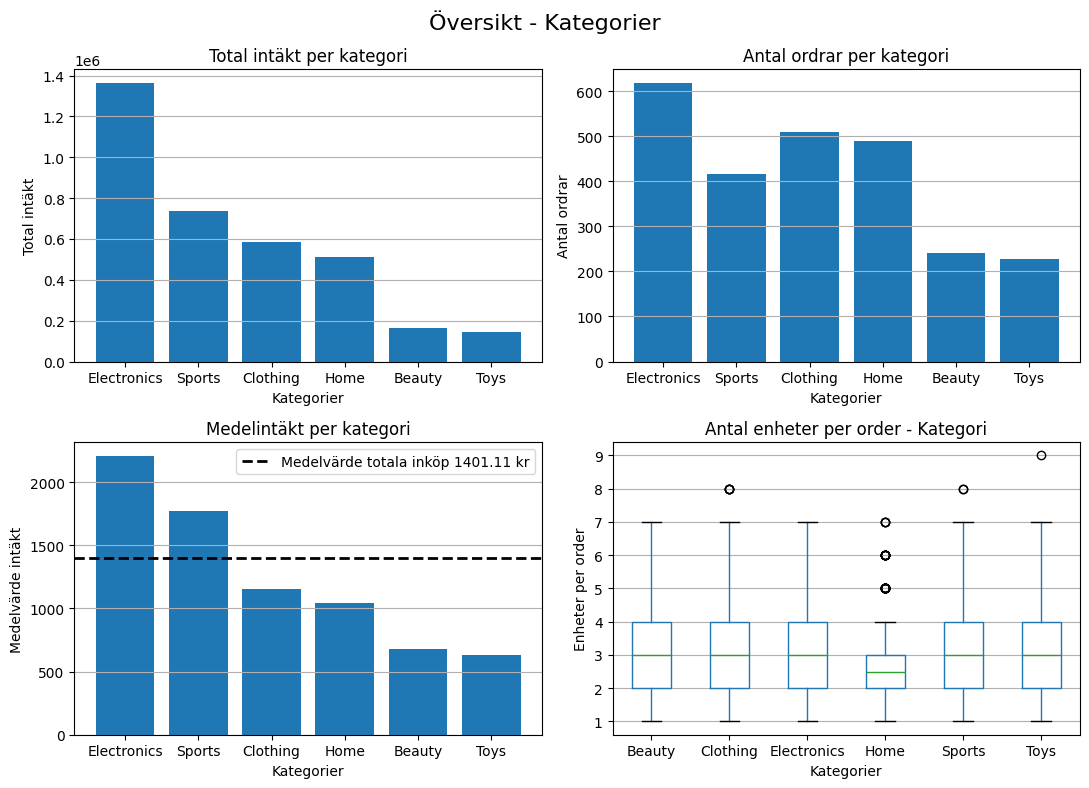

In [ ]:
by_category =round(me.groupby_category(df),0)

aov = me.average_vaule_order(df)
fig, axes = plt.subplots(2, 2, figsize=(11, 8), sharex=False, sharey=False)
vi.bar(axes[0,0], by_category['category'], by_category['total'], 'Total intäkt per kategori', 'Kategorier', 'Total intäkt')
vi.bar(axes[0,1], by_category['category'], by_category['antal'], 'Antal ordrar per kategori', 'Kategorier', 'Antal ordrar')
vi.bar(axes[1,0], by_category['category'], by_category['medel'], 'Medelintäkt per kategori', 'Kategorier', 'Medelvärde intäkt')
axes[1,0].axhline(aov, linestyle='--', color='black', linewidth=2, label=f'Medelvärde totala inköp {aov} kr' ) 
axes[1,0].legend()
vi.box(axes[1,1],df,'units','category','Antal enheter per order - Kategori', 'Kategorier', 'Enheter per order',)
fig.suptitle('Översikt - Kategorier', fontsize=16)
plt.tight_layout()


# Var säljer vi
Diagrammen visar vilka städer som driver mest intäkt samt AOV per stad

In [17]:
"""Läs in diagram från viz.py som visar revenue per stad"""


'Läs in diagram från viz.py som visar revenue per stad'

In [18]:
"""Läs in diagram från viz.py som visar AOV per stad"""

'Läs in diagram från viz.py som visar AOV per stad'

# När säljer vi
Diagrammet visar intäkt per månad via tidsaxel

In [19]:
"""Läs in diagram från viz.py som visar intäkt per månad"""

'Läs in diagram från viz.py som visar intäkt per månad'

# Topplistor 
Visa top 3 kategorier sorterat på intäkt

In [20]:
top_3_category = by_category[['category','total']].head(3)


print(f'Topp 3 bäst säljande kategorier:\n\n {top_3_category}')

Topp 3 bäst säljande kategorier:

       category      total
0  Electronics  1364228.0
1       Sports   734653.0
2     Clothing   586745.0


# Avvikelser
Här får vi se vad vi lägger in när vi tagit ut olika data

# Rekomendatioen
Här lägger vi in våra rekomendtioner när vi analyserat datan